In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
housing_data = pd.read_csv('datasets/housing.csv')

housing_data.sample(5)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
6220,-117.91,34.05,35.0,3189.0,NaN,1727.0,500.0,5.0758,211100.0,<1H OCEAN
3759,-118.38,34.18,32.0,3553.0,1060.0,3129.0,1010.0,2.5603,174200.0,<1H OCEAN
9657,-120.62,36.99,32.0,2455.0,508.0,1344.0,492.0,1.9732,69400.0,INLAND
4753,-118.33,34.04,31.0,1090.0,251.0,955.0,239.0,2.9130,192500.0,<1H OCEAN
10112,-117.94,33.94,30.0,1596.0,307.0,845.0,309.0,4.5096,241100.0,<1H OCEAN


In [3]:
housing_data= housing_data.dropna()

In [4]:
housing_data.shape

(20433, 10)

In [5]:
#we had seen a cap around 5000001. We use this cmd to see how many records in the data set have median house value of 500001
housing_data.loc[housing_data['median_house_value'] == 500001].count()
#nearly 1000 recors out of 20000 records are at this upper cap of hpuse price
#This type of data can skew the training of our Ml model hence it is best to drop them
#Working with skewed datasets where there is lots of data clustred around a single value or in a single class

longitude             958
latitude              958
housing_median_age    958
total_rooms           958
total_bedrooms        958
population            958
households            958
median_income         958
median_house_value    958
ocean_proximity       958
dtype: int64

In [6]:
#ignore the clustering data
housing_data = housing_data.drop(housing_data.loc[housing_data['median_house_value'] == 500001].index)

In [7]:
housing_data.shape

(19475, 10)

In [8]:
housing_data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [9]:
#All features have numeric value except ocean_proximity. It contains categorial or discrete values not numbers
housing_data['ocean_proximity'].unique()

array(['NEAR BAY', '<1H OCEAN', 'INLAND', 'NEAR OCEAN', 'ISLAND'],
      dtype=object)

In [10]:
#We need to convert string values in numeric> We can use one-hot encoding to convert ocean_proximity column to numeric form
# use pd.get_dummies function for this. It will convert the column to one-hot form and remove original column
housing_data = pd.get_dummies(housing_data, columns=['ocean_proximity'])

In [11]:
housing_data.shape

(19475, 14)

In [12]:
housing_data.sample(5)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
20347,-119.00,34.19,5.0,3634.0,718.0,1317.0,743.0,4.2917,227900.0,1,0,0,0,0
50,-122.27,37.82,21.0,896.0,453.0,735.0,438.0,0.9218,171900.0,0,0,0,1,0
5489,-118.45,33.99,26.0,1919.0,405.0,953.0,371.0,6.0672,420800.0,1,0,0,0,0
4020,-118.51,34.18,37.0,1893.0,365.0,911.0,324.0,4.8036,295300.0,1,0,0,0,0
404,-122.27,37.90,52.0,2079.0,273.0,684.0,275.0,7.9556,374400.0,0,0,0,1,0


In [13]:
#X values are features or data used to train the model. X values are all of are input columns except median_house_value
#Y values are our predictions. Y values are target
X = housing_data.drop('median_house_value', axis = 1)
Y = housing_data['median_house_value']

In [14]:
#Names of features used to train the model
X.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'ocean_proximity_<1H OCEAN', 'ocean_proximity_INLAND',
       'ocean_proximity_ISLAND', 'ocean_proximity_NEAR BAY',
       'ocean_proximity_NEAR OCEAN'],
      dtype='object')

In [15]:
# split data into test set and training set
#training set is used to train the model. Test data is a little bit of original dataset that we will hold out, that we wont let the model see during training phase
# test data- measures how well trained model performs on instances it has never seen before
#test_train_split function in scikit allows to quickly split up the data into traing set and test set
# typically we do 80/20 split for train and test
#data is shuffled

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X,Y, test_size =0.2)

In [16]:
x_train.shape, x_test.shape

((15580, 13), (3895, 13))

In [17]:
y_train.shape, y_test.shape

((15580,), (3895,))

In [18]:
from sklearn.linear_model import LinearRegression
linear_model = LinearRegression(normalize = True).fit(x_train, y_train)

In [19]:
print("Training_score: ", linear_model.score(x_train, y_train))

Training_score:  0.6115165701332771


In [20]:
predictors = x_train.columns
predictors

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'ocean_proximity_<1H OCEAN', 'ocean_proximity_INLAND',
       'ocean_proximity_ISLAND', 'ocean_proximity_NEAR BAY',
       'ocean_proximity_NEAR OCEAN'],
      dtype='object')

In [21]:
coef = pd.Series(linear_model.coef_, predictors).sort_values()
print(coef)

longitude                    -2.490250e+04
latitude                     -2.301620e+04
population                   -3.039132e+01
total_rooms                  -7.101224e+00
households                    4.676018e+01
total_bedrooms                8.877367e+01
housing_median_age            9.411628e+02
median_income                 3.852738e+04
ocean_proximity_INLAND        2.226686e+15
ocean_proximity_NEAR BAY      2.226686e+15
ocean_proximity_<1H OCEAN     2.226686e+15
ocean_proximity_NEAR OCEAN    2.226686e+15
ocean_proximity_ISLAND        2.226686e+15
dtype: float64


In [22]:
y_pred = linear_model.predict(x_test)

In [23]:
df_pred_actual = pd.DataFrame({'predicted': y_pred, 'actual': y_test})
df_pred_actual.head(10)

,predicted,actual
2263,88331.25,55500.0
1641,250418.00,166800.0
7629,216713.75,187900.0
6749,225077.25,257200.0
16837,297199.50,273000.0
17809,320404.50,351600.0
15403,214320.75,240100.0
18137,305919.75,343100.0
18647,237147.00,256700.0
16093,225017.00,316200.0


In [24]:
from sklearn.metrics import r2_score
print("Testing_score: ", r2_score(y_test, y_pred))

Testing_score:  0.6184641382448163


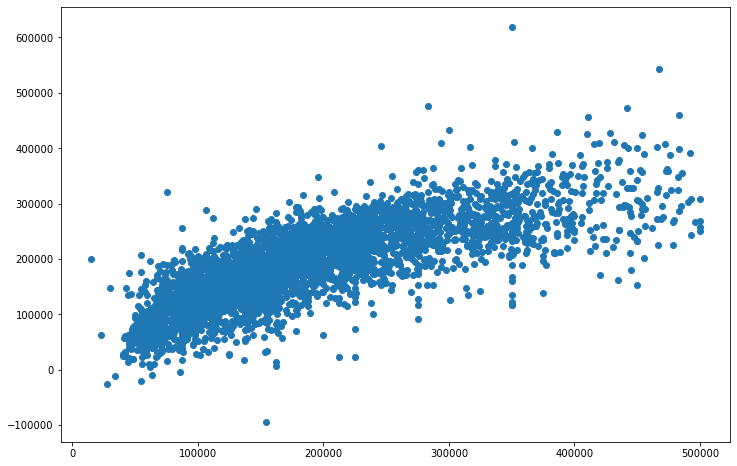

In [25]:
fig, ax = plt.subplots(figsize =(12, 8))
plt.scatter(y_test, y_pred)
plt.show()

In [26]:
df_pred_actual_sample = df_pred_actual.sample(100)
df_pred_actual_sample = df_pred_actual_sample.reset_index()

In [27]:
df_pred_actual_sample.head()

,index,predicted,actual
0,1347,233256.00,166000.0
1,3187,83659.00,87500.0
2,18857,75325.75,56000.0
3,9262,35836.75,51800.0
4,13552,89540.75,64900.0


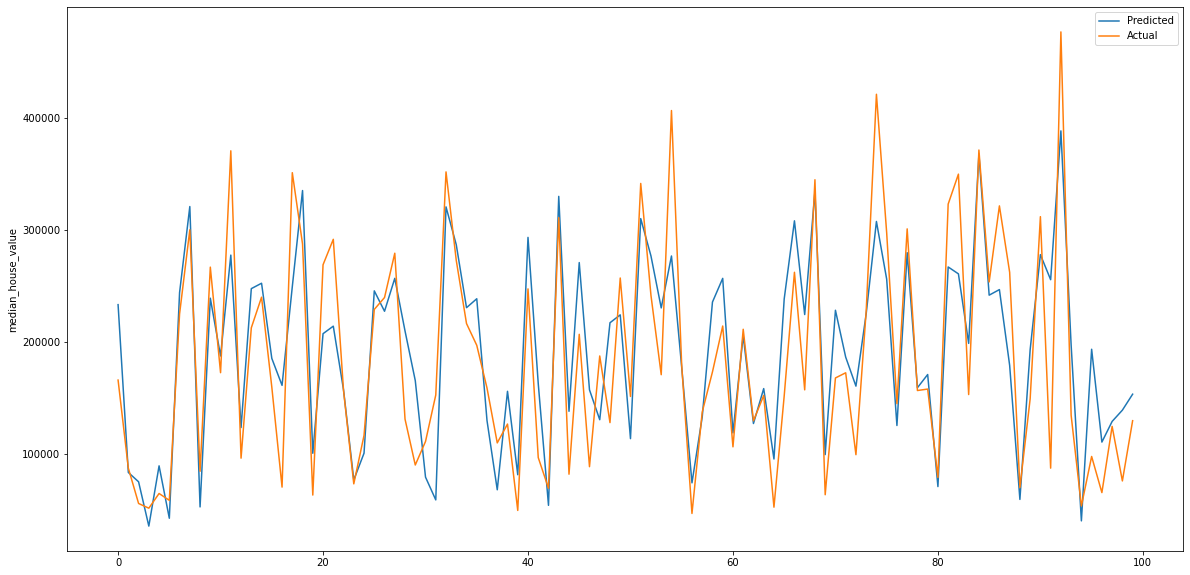

In [28]:
plt.figure(figsize=(20,10))
plt.plot(df_pred_actual_sample['predicted'], label ='Predicted')
plt.plot(df_pred_actual_sample['actual'], label ='Actual')
plt.ylabel('median_house_value')

plt.legend()
plt.show()